STEP - 1 :
          Firstly load and clean the dataset for any null or duplicate entry.

In [2]:
import pandas as pd
df=pd.read_csv("train.csv",na_values=["null","NULL","NaN","nan"])   #Checks for null values in the dataset
print("NULL entries : \n", df.isnull().sum())
df= df.dropna(subset=["Postal Code"])   #Deletes the null rows in Postal Code
duplicates =df.duplicated().sum()
df.head()   #Prints the head (attributes)
print("\nTotal duplicates : ",duplicates)
df[df.duplicated()]     #if duplicate found, then it prints the duplicates

NULL entries : 
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

Total duplicates :  0


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


STEP - 2 :
          Convert the dates from string to date-time format.
          (The date and time in dataset is usually in string form. Converting them in date-time format is important)
          

In [3]:
df["Order Date"]=pd.to_datetime(df["Order Date"],
dayfirst=True , errors="coerce")        #dayfirst is used to check DD/MM/YYYY format. If it is false, MM/DD/YYYY format is followed.
df["Ship Date"]=pd.to_datetime(df["Ship Date"], dayfirst=True, errors="coerce")

STEP - 3 :
          Data visulization for the given dataset ->
            3.1 - Sales by Region
            3.2 - Category vs Sales
            3.3 - Sales Trend over Years
            3.4 - Top 10 products 
            3.5 - Delivery efficiency analysis

(3.1) SALES BY REGION [PIE CHART + BAR GRAPH]

    1. Matplotlib is used for basic plotting such as pie, bar, lines, etc.
    2. Group the dataset on basis of "Region" and get the sum of total sales done by ["Sales"].sum()
    3. region_sales -> Total Sales by Region ,  label -> labels the regions , autopct -> shows the percentage data , startangle -> Pie chart starting angle. 

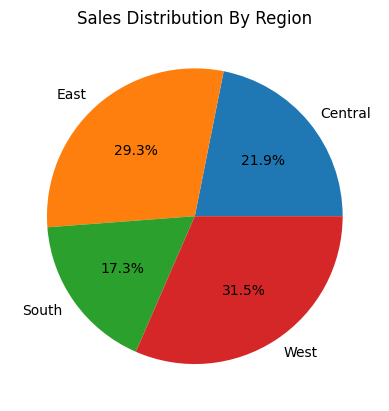

C:\Users\Kritee\AppData\Local\Temp\ipykernel_17352\1486475989.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")


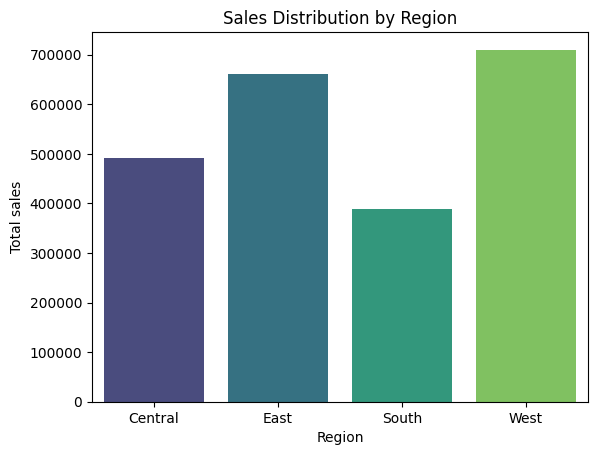

In [4]:
# PIE - CHART
import matplotlib.pyplot as plt

region_sales = df.groupby("Region")["Sales"].sum()

plt.pie( region_sales, labels = region_sales.index, autopct="%1.1f%%", startangle=0 )
plt.title("Sales Distribution By Region")
plt.show()

# BAR - GRAPH

import seaborn as sns
sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")
plt.title("Sales Distribution by Region")
plt.ylabel("Total sales")
plt.show()

(3.2) CATEGORY VS SALES 

    1. Group the dataset on basis of "Category" and get the total sales and arrange the result in descending order.
    2. x-axis -> categories such as Technology, Furniture, Office Supplies, etc. , y-axis -> total sales values.
    

C:\Users\Kritee\AppData\Local\Temp\ipykernel_10364\3984284273.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="magma")


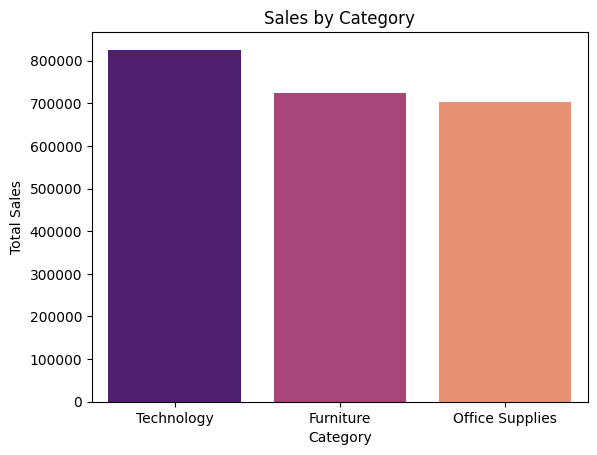

In [19]:
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values, palette="magma")
plt.title("Sales by Category")
plt.ylabel("Total Sales")
plt.show()

(3.3) SALES TREND OVER YEARS


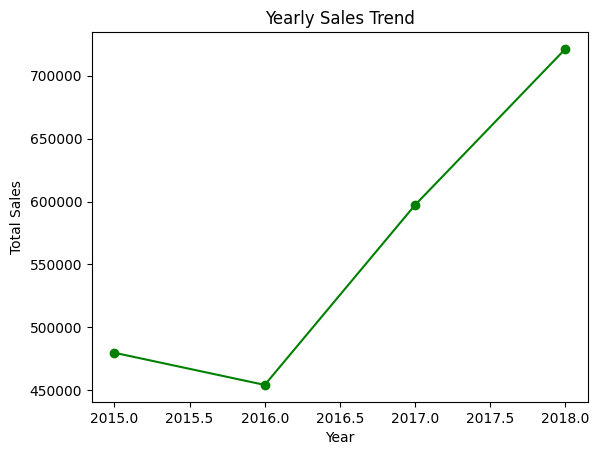

In [20]:
df["Order Year"]=df["Order Date"].dt.year
yearly_sales = df.groupby("Order Year")["Sales"].sum()
plt.plot(yearly_sales.index, yearly_sales.values, marker="o", color="green")
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

(3.4) TOP 10 SUB-CATEGORIES BY SALES

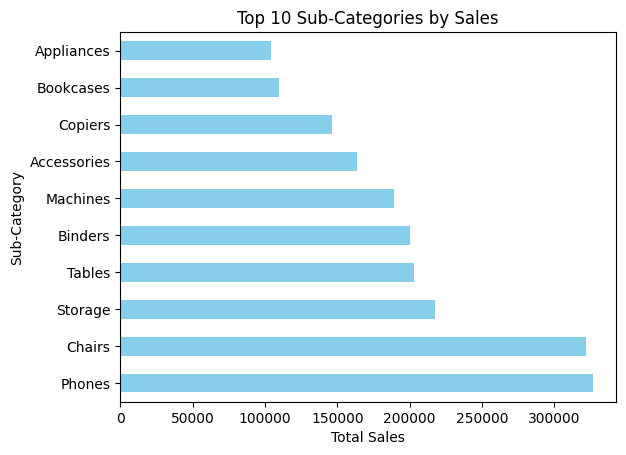

In [21]:
top_products = df.groupby("Sub-Category")["Sales"].sum().nlargest(10)
top_products.plot(kind="barh", color="skyblue")
plt.title("Top 10 Sub-Categories by Sales")
plt.xlabel("Total Sales")
plt.show()

(3.5) DELIVERY EFFICIENCY ANALYSIS

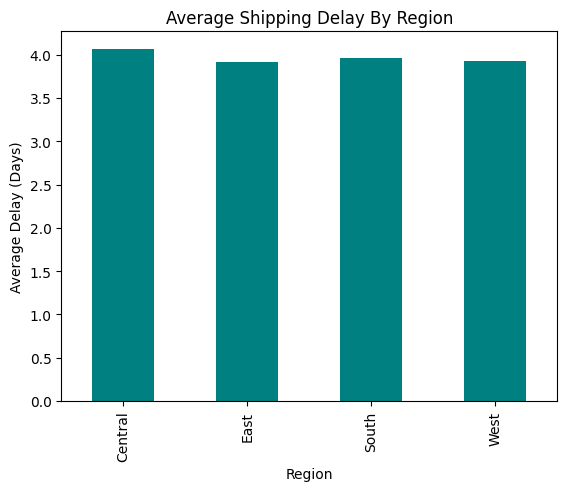

In [22]:
# Average Shipping Delay by Region

df["Shipping Delay"]=(df["Ship Date"]-df["Order Date"]).dt.days
region_delay = df.groupby("Region")["Shipping Delay"].mean()
region_delay.plot(kind="bar", color="teal")
plt.title("Average Shipping Delay By Region")
plt.ylabel("Average Delay (Days)")
plt.show()

C:\Users\Kritee\AppData\Local\Temp\ipykernel_10364\962301814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipmode_delay.index, y=shipmode_delay.values, palette="viridis")


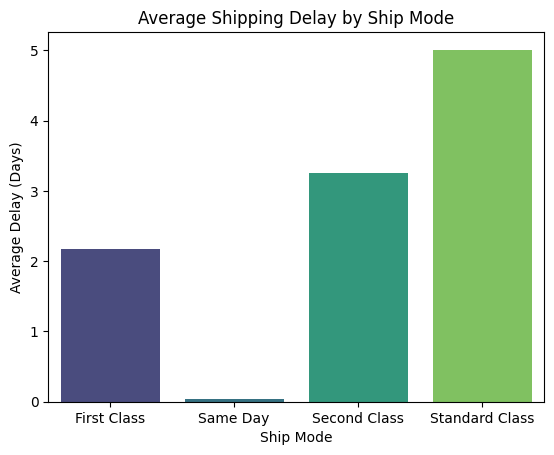

In [23]:
# Shipping Delay by Ship Mode
shipmode_delay = df.groupby("Ship Mode")["Shipping Delay"].mean()
sns.barplot(x=shipmode_delay.index, y=shipmode_delay.values, palette="viridis")
plt.title("Average Shipping Delay by Ship Mode")
plt.ylabel("Average Delay (Days)")
plt.show()

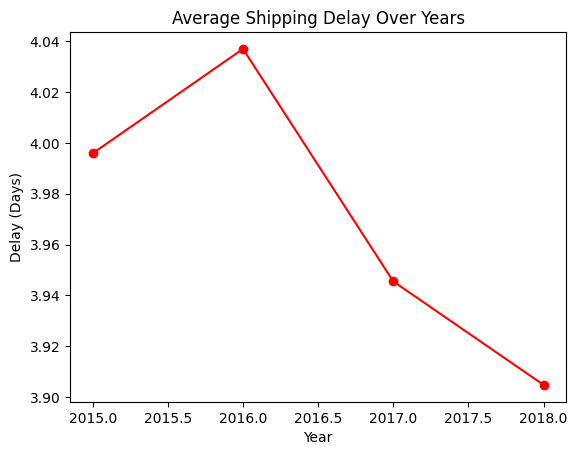

In [24]:
#Yearly Trend Of Shipping Delay
yearly_delay = df.groupby(df["Order Date"].dt.year)["Shipping Delay"].mean()
plt.plot(yearly_delay.index, yearly_delay.values, marker="o", color="red")
plt.title("Average Shipping Delay Over Years")
plt.xlabel("Year")
plt.ylabel("Delay (Days)")
plt.show()

In [25]:
# Too late shipments
late_orders = df[df["Shipping Delay"]>10]
print("Order delayed more than 10 days : ", late_orders.shape[0])

Order delayed more than 10 days :  0
